# Exploratory Data Analysis on Football Statistics
In the world of football, data has become a vital tool that many teams, analysts, and enthusiasts use to understand performance and strategy. Statistical analysis allows us to measure the efficiency of a player or a team, predict future performance, and make comparisons over time or between peers. This report presents an exploratory data analysis (EDA) on a particular dataset of football statistics, sourced from Kaggle and titled '2021-2022 Football Player Stats'.

The dataset, df_football_stats, is a comprehensive collection of football player performance metrics collected across various leagues. It contains a rich array of information, including but not limited to, player positions, number of goals, assists, pass completion percentage, cross completion percentage, tackles won, successful dribble percentage, yellow and red cards, and fouls committed.

Our primary goal with this analysis is to uncover patterns, relationships, and structures within the data that can provide valuable insights. This may aid in evaluating player performance, scouting for talent, informing tactical decisions, or even predicting future outcomes.

Throughout the EDA, we will employ a variety of statistical and visualization techniques to understand the distribution of variables, identify any correlations, detect outliers, and spot any data irregularities that may need further cleaning or transformation.

As we journey through this exploratory process, we aim to answer some fundamental questions like:

What performance metrics correlate strongly with a team's success?
Are there distinguishable clusters of players when we consider multiple performance metrics?
How does the position of a player influence their individual stats?
Can we identify the standout performers and underperformers based on their stats?

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from scipy.spatial import ConvexHull
from adjustText import adjust_text

Load Data

In [2]:
raw_data = pd.read_csv("C:/Users/vicente/Desktop/Data Portfolio/2021-2022 Football Player Stats/2021-2022 Football Player Stats.csv", sep = ';', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)
raw_data.head(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.0,0.0,0.0,34.0,45.0,75.5,574.1,214.8,17.5,19.4,90.0,13.1,17.0,77.0,3.06,6.78,45.2,0.06,0.59,1.56,1.13,0.25,2.94,45.0,34.4,10.60,0.84,0.06,5.41,0.59,1.41,0.00,0.0,0.0,0.0,26.5,9.59,8.94,4.91,29.0,0.91,9.72,0.06,34.0,0.22,0.88,1.63,1.75,1.19,0.84,0.06,0.09,0.13,0.06,0.00,0.16,0.16,0.0,0.00,0.0,0.00,0.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.6,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.0,58.0,5.06,23.3,23.8,15.0,0.91,47.8,1.03,2.44,42.3,1.09,0.19,33.9,199.4,121.7,5.44,1.66,0.41,0.84,0.94,36.0,32.4,89.9,1.28,0.25,0.00,0.00,0.97,1.84,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.0,0.0,0.0,38.7,47.0,82.4,835.8,287.9,10.2,11.4,89.9,22.4,25.0,89.4,5.65,9.15,61.7,0.00,0.24,2.45,0.18,0.00,2.72,47.0,44.0,3.02,2.45,0.00,5.68,1.66,0.06,0.00,0.0,0.0,0.0,35.3,3.78,7.95,31.70,12.1,1.48,0.42,0.12,38.7,0.15,0.97,1.24,0.88,0.63,0.42,0.00,0.09,0.03,0.00,0.09,0.03,0.00,0.0,0.03,0.0,0.00,0.0,1.87,1.39,1.24,0.60,0.03,0.39,0.82,48.1,0.42,13.6,4.89,35.9,7.61,5.14,0.88,1.87,0.79,0.06,1.09,3.11,4.98,3.20,0.0,57.3,8.28,32.8,25.7,2.9,0.85,54.5,0.48,0.66,72.7,0.48,0.03,35.7,204.7,115.5,2.75,0.73,0.00,0.45,0.39,37.5,36.3,96.9,0.36,0.15,0.03,0.00,1.30,0.73,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.0,0.0,0.0,55.9,61.0,91.7,1033.3,184.4,22.5,24.1,93.5,25.8,27.2,94.9,6.72,7.81,86.0,0.00,0.55,2.81,0.47,0.04,2.96,61.0,60.3,0.73,0.58,0.04,8.03,0.80,0.36,0.00,0.0,0.0,0.0,52.6,4.71,3.72,4.82,53.1,1.90,0.15,0.29,55.9,0.07,0.58,1.24,0.84,1.46,1.09,0.00,0.00,0.15,0.15,0.07,0.04,0.04,0.0,0.00,0.0,0.00,0.0,2.01,1.24,0.91,0.91,0.18,0.69,2.15,32.2,1.46,23.4,6.53,27.9,7.19,12.30,3.94,0.99,0.04,0.00,0.95,1.86,3.87,0.55,0.0,70.4,2.01,22.7,41.8,10.9,0.62,69.9,0.99,1.53,64.3,1.09,0.07,53.5,246.5,106.3,2.85,0.73,0.15,0.84,1.46,58.6,54.2,92.5,1.72,0.44,0.11,0.07,1.64,1.28,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.0,0.0,0.0,40.7,49.8,81.6,780.8,206.0,16.3,18.4,88.6,17.3,19.6,87.9,6.25,9.39,66.6,0.06,0.91,3.87,0.58,0.18,4.18,49.8,49.0,0.85,0.64,0.18,9.48,1.49,0.79,0.03,0.0,0.0,0.0,37.6,5.64,6.65,4.48,43.9,0.73,0.15,0.15,40.7,0.21,0.55,1.83,1.68,2.01,1.49,0.06,0.03,0.03,0.21,0.18,0.15,0.12,0.0,0.00,0.0,0.03,0.0,3.57,2.23,1.49,1.71,0.37,1.80,4.97,36.2,3.17,28.0,7.90,28.2,9.27,15.30,3.41,1.68,0.09,0.00,1.59,2.56,6.13,0.34,0.0,61.6,0.67,13.7,40.3,11.6,0.46,60.9,1.28,1.98,64.6,1.34,0.09,45.7,171.9,86.4,2.87,1.13,0.09,0.85,1.46,46.3,43.0,93.0,1.86,0.27,0.00,0.00,1.40,2.07,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,0.5

In [3]:
football_stats = raw_data.copy()
football_stats.head(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.0,0.0,0.0,34.0,45.0,75.5,574.1,214.8,17.5,19.4,90.0,13.1,17.0,77.0,3.06,6.78,45.2,0.06,0.59,1.56,1.13,0.25,2.94,45.0,34.4,10.60,0.84,0.06,5.41,0.59,1.41,0.00,0.0,0.0,0.0,26.5,9.59,8.94,4.91,29.0,0.91,9.72,0.06,34.0,0.22,0.88,1.63,1.75,1.19,0.84,0.06,0.09,0.13,0.06,0.00,0.16,0.16,0.0,0.00,0.0,0.00,0.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.6,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.0,58.0,5.06,23.3,23.8,15.0,0.91,47.8,1.03,2.44,42.3,1.09,0.19,33.9,199.4,121.7,5.44,1.66,0.41,0.84,0.94,36.0,32.4,89.9,1.28,0.25,0.00,0.00,0.97,1.84,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.0,0.0,0.0,38.7,47.0,82.4,835.8,287.9,10.2,11.4,89.9,22.4,25.0,89.4,5.65,9.15,61.7,0.00,0.24,2.45,0.18,0.00,2.72,47.0,44.0,3.02,2.45,0.00,5.68,1.66,0.06,0.00,0.0,0.0,0.0,35.3,3.78,7.95,31.70,12.1,1.48,0.42,0.12,38.7,0.15,0.97,1.24,0.88,0.63,0.42,0.00,0.09,0.03,0.00,0.09,0.03,0.00,0.0,0.03,0.0,0.00,0.0,1.87,1.39,1.24,0.60,0.03,0.39,0.82,48.1,0.42,13.6,4.89,35.9,7.61,5.14,0.88,1.87,0.79,0.06,1.09,3.11,4.98,3.20,0.0,57.3,8.28,32.8,25.7,2.9,0.85,54.5,0.48,0.66,72.7,0.48,0.03,35.7,204.7,115.5,2.75,0.73,0.00,0.45,0.39,37.5,36.3,96.9,0.36,0.15,0.03,0.00,1.30,0.73,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.0,0.0,0.0,55.9,61.0,91.7,1033.3,184.4,22.5,24.1,93.5,25.8,27.2,94.9,6.72,7.81,86.0,0.00,0.55,2.81,0.47,0.04,2.96,61.0,60.3,0.73,0.58,0.04,8.03,0.80,0.36,0.00,0.0,0.0,0.0,52.6,4.71,3.72,4.82,53.1,1.90,0.15,0.29,55.9,0.07,0.58,1.24,0.84,1.46,1.09,0.00,0.00,0.15,0.15,0.07,0.04,0.04,0.0,0.00,0.0,0.00,0.0,2.01,1.24,0.91,0.91,0.18,0.69,2.15,32.2,1.46,23.4,6.53,27.9,7.19,12.30,3.94,0.99,0.04,0.00,0.95,1.86,3.87,0.55,0.0,70.4,2.01,22.7,41.8,10.9,0.62,69.9,0.99,1.53,64.3,1.09,0.07,53.5,246.5,106.3,2.85,0.73,0.15,0.84,1.46,58.6,54.2,92.5,1.72,0.44,0.11,0.07,1.64,1.28,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.0,0.0,0.0,40.7,49.8,81.6,780.8,206.0,16.3,18.4,88.6,17.3,19.6,87.9,6.25,9.39,66.6,0.06,0.91,3.87,0.58,0.18,4.18,49.8,49.0,0.85,0.64,0.18,9.48,1.49,0.79,0.03,0.0,0.0,0.0,37.6,5.64,6.65,4.48,43.9,0.73,0.15,0.15,40.7,0.21,0.55,1.83,1.68,2.01,1.49,0.06,0.03,0.03,0.21,0.18,0.15,0.12,0.0,0.00,0.0,0.03,0.0,3.57,2.23,1.49,1.71,0.37,1.80,4.97,36.2,3.17,28.0,7.90,28.2,9.27,15.30,3.41,1.68,0.09,0.00,1.59,2.56,6.13,0.34,0.0,61.6,0.67,13.7,40.3,11.6,0.46,60.9,1.28,1.98,64.6,1.34,0.09,45.7,171.9,86.4,2.87,1.13,0.09,0.85,1.46,46.3,43.0,93.0,1.86,0.27,0.00,0.00,1.40,2.07,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,0.5

Identifying Null Values

In [4]:
football_stats.isnull().sum().sum()

2

In [5]:
football_stats.columns[football_stats.isnull().any()].tolist()

['Nation', 'Age']

In [6]:
football_stats[football_stats.isnull().any(axis=1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1531,1532,Javier Llabrés,NaN,FWMF,Mallorca,La Liga,NaN,0,5,1,132,1.5,0.0,3.33,1.33,40.0,0.0,0.0,24.5,0.0,0.0,0.0,29.3,42.0,69.8,528.7,88.0,15.3,18.7,82.1,10.7,15.3,69.6,3.33,6.67,50.0,0.0,1.33,1.33,0.67,0.0,0.67,42.0,40.7,1.33,0.0,0.0,9.33,2.67,3.33,0.67,0.0,0.0,0.0,24.0,10.0,8.0,6.0,32.7,1.33,0.67,0.67,29.3,0.67,2.0,0.67,0.0,2.67,1.33,0.0,0.67,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.67,0.67,0.67,0.67,1.33,50.0,0.67,10.0,3.33,33.3,1.33,4.67,4.0,0.67,0.0,0.0,0.67,0.0,2.0,0.0,0.0,55.3,0.0,4.0,24.0,29.3,2.67,54.0,2.0,3.33,60.0,2.67,0.0,38.7,178.0,86.0,6.0,0.67,1.33,1.33,2.67,54.0,44.0,81.5,8.0,0.0,0.0,0.0,0.0,0.67,0.67,3.33,2.0,0.0,0.0,0.0,5.33,0.67,2.0,25.0


Player's Positions

In [7]:
football_stats['Pos'].unique()

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW', 'GKMF'], dtype=object)

Cleaning Data

Organizing the DataFrame for analysis

In [8]:
df_football_stats = pd.DataFrame()

In [16]:
df_football_stats['Player'] = football_stats['Player']
df_football_stats['Nation'] = football_stats['Nation']
df_football_stats['Pos'] = football_stats['Pos']
df_football_stats['Squad'] = football_stats['Squad']
df_football_stats['Comp'] = football_stats['Comp']
df_football_stats['Age'] = football_stats['Age']
df_football_stats['MP'] = football_stats['MP']
df_football_stats['G/90'] = football_stats['Goals']
df_football_stats['G/Sh'] = football_stats['G/Sh']
df_football_stats['PKGoals'] = ((football_stats['ShoPK'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PKAttempted'] = ((football_stats['PKatt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Goals'] = ((football_stats['Goals'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Pass'] = ((football_stats['PasTotAtt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PassCompleted'] = ((football_stats['PasTotCmp'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['PassComp%'] = ((df_football_stats['PassCompleted'] / df_football_stats['Pass']) * 100).round(2)
df_football_stats['Assist'] = ((football_stats['Assists'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Cross'] = ((football_stats['PasCrs'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['CrossCompleted'] = ((football_stats['CrsPA'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['CrossComp%'] = ((df_football_stats['CrossCompleted'] / df_football_stats['Cross']) * 100).round(2)
df_football_stats['Tackle_Won'] = ((football_stats['TklWon'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['SucDribble'] = ((football_stats['DriSucc'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Dribble'] = ((football_stats['DriAtt'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['DribbleComp%'] = ((df_football_stats['SucDribble'] / df_football_stats['Dribble']) * 100).round(2)
df_football_stats['YCards'] = ((football_stats['CrdY'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['RCards'] = ((football_stats['CrdR'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Fls'] = ((football_stats['Fls'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['Fld'] = ((football_stats['Fld'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['OGoals'] = ((football_stats['OG'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerWon'] = ((football_stats['AerWon'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerLost'] = ((football_stats['AerLost'] * football_stats['Min']) / 90).round(0).astype(int)
df_football_stats['AerWon%'] = ((football_stats['AerWon'] / (football_stats['AerWon'] + football_stats['AerLost'])) * 100).round(2)

In [18]:
df_football_stats.head(10)

,PKGoals,PKAttempted,Goals,Pass,PassCompleted,Assist,Cross,CrossCompleted,Tackle_Won,SucDribble,Dribble,YCards,RCards,Fls,Fld,OGoals,AerWon,AerLost,PassComp%,CrossComp%,DribbleComp%,AerWon%,Player,Nation,Pos,Squad,Comp,Age,MP,G/Sh,G/90
0,0,0,0,1440,1088,2,45,8,37,33,78,8,0,31,59,1,15,51,75.56,17.78,42.31,22.82,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,34,0.00,0.00
1,0,0,2,1558,1283,0,2,0,46,16,22,5,1,43,24,0,67,45,82.35,0.00,72.73,59.76,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,34,0.11,0.06
2,0,0,1,1669,1529,0,10,1,34,27,42,12,3,45,35,0,24,24,91.61,10.00,64.29,50.00,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,31,0.06,0.04
3,0,0,0,1636,1337,2,26,6,73,42,65,9,0,46,68,0,14,14,81.72,23.08,64.62,50.00,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,34,0.00,0.00
4,0,0,0,6,2,0,1,0,0,0,0,0,0,1,0,0,1,0,33.33,0.00,NaN,100.00,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,1,0.00,0.00
5,0,0,0,139,90,1,2,0,7,6,18,3,0,18,12,0,22,40,64.75,0.00,33.33,35.51,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23.0,24,0.00,0.00
6,0,0,0,10,8,0,1,0,0,1,2,0,0,2,1,0,0,2,80.00,0.00,50.00,0.00,Matthis Abline,FRA,FW,Rennes,Ligue 1,19.0,7,0.00,0.00
7,3,3,17,692,500,4,24,4,22,37,76,9,0,43,50,0,82,99,72.25,16.67,48.68,45.27,Tammy Abraham,ENG,FW,Roma,Serie A,24.0,37,0.15,0.50
8,0,0,0,221,195,0,0,0,6,0,0,2,0,5,5,1,12,15,88.24,NaN,NaN,44.50,Luis Abram,PER,DF,Granada,La Liga,26.0,8,0.00,0.00
9,0,0,4,2003,1812,0,1,0,12,3,4,2,1,20,19,0,80,45,90.46,0.00,75.00,63.96,Francesco Acerbi,ITA,DF,Lazio,Serie A,34.0,30,0.25,0.14


In [19]:
def data_overview(df):
    # Checking total missing values
    print("Total Missing Values:")
    print(df.isnull().sum().sum())
    
    # Checking columns with missing values
    print("\nColumns with Missing Values:")
    print(df.columns[df.isnull().any()].tolist())
    
    # Checking rows with missing values
    print("\nRows with Missing Values:")
    print(df[df.isnull().any(axis=1)])
    
    # Checking unique values in 'Pos' column
    print("\nUnique Positions:")
    print(df['Pos'].unique())
    
   
    # Checking the first five rows of the modified dataframe
    print("\nHead of Modified DataFrame:")
    print(df.head(5))

df = df_football_stats

data_overview(df)


Total Missing Values:
1660

Columns with Missing Values:
['PassComp%', 'CrossComp%', 'DribbleComp%', 'AerWon%', 'Nation', 'Age']

Rows with Missing Values:
      PKGoals  PKAttempted  Goals  Pass  PassCompleted  Assist  Cross   
4           0            0      0     6              2       0      1  \
8           0            0      0   221            195       0      0   
11          0            0      0     6              3       0      0   
22          0            0      0    82             61       0      0   
28          0            0      0     2              2       0      0   
...       ...          ...    ...   ...            ...     ...    ...   
2906        0            0      0    68             49       0      0   
2909        0            0      0   235            178       0      0   
2912        0            0      0    25             23       0      0   
2914        0            0      0    11              8       0      0   
2920        0            0      2   224  

Clean and check errors on data

In [ ]:
def missing_values(df):
    """
    Function to check for any missing values in the dataframe.
    """
    if df.isnull().sum().sum() > 0:
        return df.isnull().sum()
    else:
        return "No missing values in the DataFrame"

def remove_duplicates(df):
    """
    Function to remove duplicates from the dataframe.
    """
    initial_size = df.shape[0]
    df.drop_duplicates(inplace=True)
    print(f"Dropped {initial_size - df.shape[0]} duplicates")

def detect_outliers(df, col):
    """
    Function to detect outliers using the IQR method.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

def invalid_goals(df):
    """
    Function to handle invalid 'Goals' values. 
    In this case, we assume 'Goals' cannot be negative.
    """
    if any(df['Goals'] < 0):
        df.loc[df['Goals'] < 0, 'Goals'] = 0 
        print("Invalid 'Goals' values handled.")
    else:
        return "No invalid 'Goals' values in the DataFrame"


df = df_football_stats

print("Missing Values: ")
print(missing_values(df))

print("\nRemoving Duplicates: ")
remove_duplicates(df)

print("\nOutliers in 'Goals': ")
print(detect_outliers(df, 'Goals'))

# handle invalid 'Goals' values
print("\nHandling Invalid 'Goals' values: ")
invalid_goals(df)


Missing Values: 
Player              0
Nation              1
Pos                 0
Squad               0
Comp                0
Age                 1
MP                  0
G/90                0
G/Sh                0
PKGoals             0
PKAttempted         0
Goals               0
Pass                0
PassCompleted       0
PassComp%          65
Assist              0
Cross               0
CrossCompleted      0
CrossComp%        753
Tackle_Won          0
SucDribble          0
Dribble             0
DribbleComp%      493
YCards              0
RCards              0
Fls                 0
Fld                 0
OGoals              0
AerWon              0
AerLost             0
AerWon%           347
dtype: int64

Removing Duplicates: 
Dropped 0 duplicates

Outliers in 'Goals': 
                Player Nation Pos           Squad            Comp   Age  MP   
7        Tammy Abraham    ENG  FW            Roma         Serie A  24.0  37  \
13           Che Adams    SCO  FW     Southampton  Premier Leag

"No invalid 'Goals' values in the DataFrame"

Who is the youngest player in dataset?

In [21]:
    # Finding the minimum age
    print("\nMinimum Age:")
    print(df['Age'].min())


Minimum Age:
16.0


In [ ]:
    # Finding players with the minimum age
    print("\nYoungest Players:")
    print(df[df.Age == 16.0].iloc[:, 0:6])

,Player,Nation,Pos,Squad,Comp,Age
83,Wisdom Amey,ITA,DF,Bologna,Serie A,16.0
317,Tom Bischof,GER,MFFW,Hoffenheim,Bundesliga,16.0
2027,Simone Pafundi,ITA,FW,Udinese,Serie A,16.0
2820,Paul Wanner,GER,FWMF,Bayern Munich,Bundesliga,16.0
2873,Leny Yoro,FRA,MF,Lille,Ligue 1,16.0


Top 5 Players with most Goals per 90 minutes (at least 20 match played)

In [25]:
df[(df.MP >= 20) & (df.Pos != 'GK')].sort_values('G/90', ascending = False).head(5).iloc[:, [0,1,2,3,4,5,7]]

,Player,Nation,Pos,Squad,Comp,Age,G/90
1512,Robert Lewandowski,POL,FW,Bayern Munich,Bundesliga,33.0,1.07
1117,Erling Haaland,NOR,FW,Dortmund,Bundesliga,21.0,1.04
2425,Patrik Schick,CZE,FW,Leverkusen,Bundesliga,26.0,1.04
1712,Eric Maxim Choupo-Moting,CMR,FWMF,Bayern Munich,Bundesliga,33.0,0.95
284,Karim Benzema,FRA,FW,Real Madrid,La Liga,34.0,0.94


Top 5 Efficient Strikers (at least 20 match played)

In [26]:
df[(df.MP >= 20) & (df.Pos.str.contains('FW'))].sort_values('G/Sh', ascending = False).head(5).iloc[:, [0,1,2,3,4,5,8]]

,Player,Nation,Pos,Squad,Comp,Age,G/Sh
2110,Nils Petersen,GER,FWMF,Freiburg,Bundesliga,33.0,0.33
807,Hugo Ekitike,FRA,FW,Reims,Ligue 1,19.0,0.31
811,Alberth Elis,HON,FWMF,Bordeaux,Ligue 1,26.0,0.30
1307,Juanmi,ESP,FW,Betis,La Liga,29.0,0.29
2751,Jamie Vardy,ENG,FW,Leicester City,Premier League,35.0,0.28


Players with most Penalty Goals

In [27]:
df.sort_values('PKGoals', ascending = False).head(1).iloc[:, [0,1,2,3,4,9]]

,Player,Nation,Pos,Squad,Comp,PKGoals
1242,Lorenzo Insigne,ITA,FW,Napoli,Serie A,9


Teams with most Penalties awarded

In [31]:
df.groupby(['Squad']).agg(PKAttempted = ('PKAttempted', 'sum')).reset_index()

,Squad,PKAttempted
0,Alavés,7
1,Angers,9
2,Arminia,2
3,Arsenal,8
4,Aston Villa,3
...,...,...
93,Villarreal,6
94,Watford,2
95,West Ham,6
96,Wolfsburg,4


In [32]:
team_penalty['PKAttempted'].max()

14

In [33]:
team_penalty[team_penalty.PKAttempted == 14]

,Squad,PKAttempted
64,Napoli,14


Top 5 Players with most goals

In [ ]:
df_football_stats.sort_values('Goals', ascending = False).head(5).iloc[:, [0,1,2,3,4,5,11]]

,Player,Nation,Pos,Squad,Comp,Age,Goals
1512,Robert Lewandowski,POL,FW,Bayern Munich,Bundesliga,33.0,35
1720,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,23.0,28
284,Karim Benzema,FRA,FW,Real Madrid,La Liga,34.0,27
1236,Ciro Immobile,ITA,FW,Lazio,Serie A,32.0,27
265,Wissam Ben Yedder,FRA,FW,Monaco,Ligue 1,31.0,25


Top 5 Teams with most goals (No Own Goals)

In [34]:
team_goals = df_football_stats.groupby(['Squad']).agg(Team_Goals = ('Goals', 'sum'))
team_goals = pd.DataFrame(team_goals).reset_index()

In [35]:
team_goals.sort_values('Team_Goals', ascending = False).head(5)

,Squad,Team_Goals
56,Manchester City,96
50,Liverpool,94
10,Bayern Munich,92
69,Paris S-G,88
40,Inter,83


Top 5 Midfielders with best Pass Completion Percentage (Min: 20 match played)

In [36]:
# Filter midfielders with at least 20 matches played
midfielders = df_football_stats[(df_football_stats['MP'] >= 20) & (df_football_stats['Pos'].str.contains('MF'))]

# Sort by Passing Completion Percentage in descending order
sorted_midfielders = midfielders.sort_values('PassComp%', ascending=False)

# Select top 5
top_midfielders = sorted_midfielders.head(5)

# Select columns of interest
top_midfielders.iloc[:, [0, 1, 2, 3, 4, 5, 14]]

,Player,Nation,Pos,Squad,Comp,Age,PassComp%
2086,Danilo Pereira,POR,MF,Paris S-G,Ligue 1,30.0,94.50
2853,Axel Witsel,BEL,MFDF,Dortmund,Bundesliga,33.0,93.36
960,Idrissa Gana Gueye,SEN,MF,Paris S-G,Ligue 1,32.0,93.31
1538,Stanislav Lobotka,SVK,MF,Napoli,Serie A,27.0,93.15
2283,Rodri,ESP,MF,Manchester City,Premier League,25.0,92.43


Top 5 Players with most Assists

In [ ]:
df_football_stats.sort_values('Assist', ascending = False).head(8).iloc[:, [0,1,2,3,4,5,15]]

,Player,Nation,Pos,Squad,Comp,Age,Assist
1720,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,23.0,18
1869,Thomas Müller,GER,MF,Bayern Munich,Bundesliga,32.0,18
1774,Lionel Messi,ARG,FWMF,Paris S-G,Ligue 1,34.0,14
286,Domenico Berardi,ITA,FW,Sassuolo,Serie A,27.0,14
669,Ousmane Dembélé,FRA,FW,Barcelona,La Liga,25.0,13
1944,Christopher Nkunku,FRA,FWMF,RB Leipzig,Bundesliga,24.0,13
2242,Marco Reus,GER,MFFW,Dortmund,Bundesliga,32.0,13
2360,Mohamed Salah,EGY,FW,Liverpool,Premier League,29.0,13


Top 5 Players with most Yellow Cards

In [ ]:
df_football_stats.sort_values('YCards', ascending = False).head(9).iloc[:, [0,1,2,3,4,5,23]]

,Player,Nation,Pos,Squad,Comp,Age,YCards
1632,Gianluca Mancini,ITA,DF,Roma,Serie A,26.0,16
58,Omar Alderete,PAR,DF,Valencia,La Liga,25.0,15
1553,Maxime Lopez,FRA,MF,Sassuolo,Serie A,24.0,14
2582,Damián Suárez,URU,DF,Getafe,La Liga,34.0,13
886,Jordan Ferri,FRA,MF,Montpellier,Ligue 1,30.0,13
2701,Óscar Trejo,ARG,MF,Rayo Vallecano,La Liga,34.0,13
87,Ethan Ampadu,WAL,MFDF,Venezia,Serie A,21.0,13
1411,Geoffrey Kondogbia,CTA,MFDF,Atlético Madrid,La Liga,29.0,13
109,Mauro Arambarri,URU,MF,Getafe,La Liga,26.0,13


Players with most Red Cards

In [ ]:
df_football_stats.sort_values('RCards', ascending = False).head(3).iloc[:, [0,1,2,3,4,5,24]]

,Player,Nation,Pos,Squad,Comp,Age,RCards
631,Dante,BRA,DF,Nice,Ligue 1,38.0,3
2,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,3
1458,Maxence Lacroix,FRA,DF,Wolfsburg,Bundesliga,22.0,3


Top 5 Players with most Fouls Committed

In [ ]:
df_football_stats.sort_values('Fls', ascending = False).head(5).iloc[:, [0,1,2,3,4,5,25]]

,Player,Nation,Pos,Squad,Comp,Age,Fls
1582,Saa Luki?,SRB,MF,Torino,Serie A,25.0,91
1756,Brais Méndez,ESP,MF,Celta Vigo,La Liga,25.0,89
2648,Morten Thorsby,NOR,MF,Sampdoria,Serie A,26.0,87
2729,Enes Ünal,TUR,FW,Getafe,La Liga,25.0,86
956,Conor Gallagher,ENG,MF,Crystal Palace,Premier League,22.0,84


Top 5 Teams with most Fouls Committed

In [ ]:
team_foul = df_football_stats.groupby(['Squad']).agg(Fls = ('Fls', 'sum'),
                                                     Fld = ('Fld', 'sum'))
team_foul = pd.DataFrame(team_foul).reset_index()

In [ ]:
team_foul.sort_values('Fls', ascending = False).head(5).iloc[:, [0,1]]

,Squad,Fls
91,Valencia,710
86,Torino,705
55,Mallorca,640
33,Genoa,633
34,Getafe,632


Total Goals Scored by Club viz

Text(0.5, 1.0, '\nTotal Goals Scored By Club')

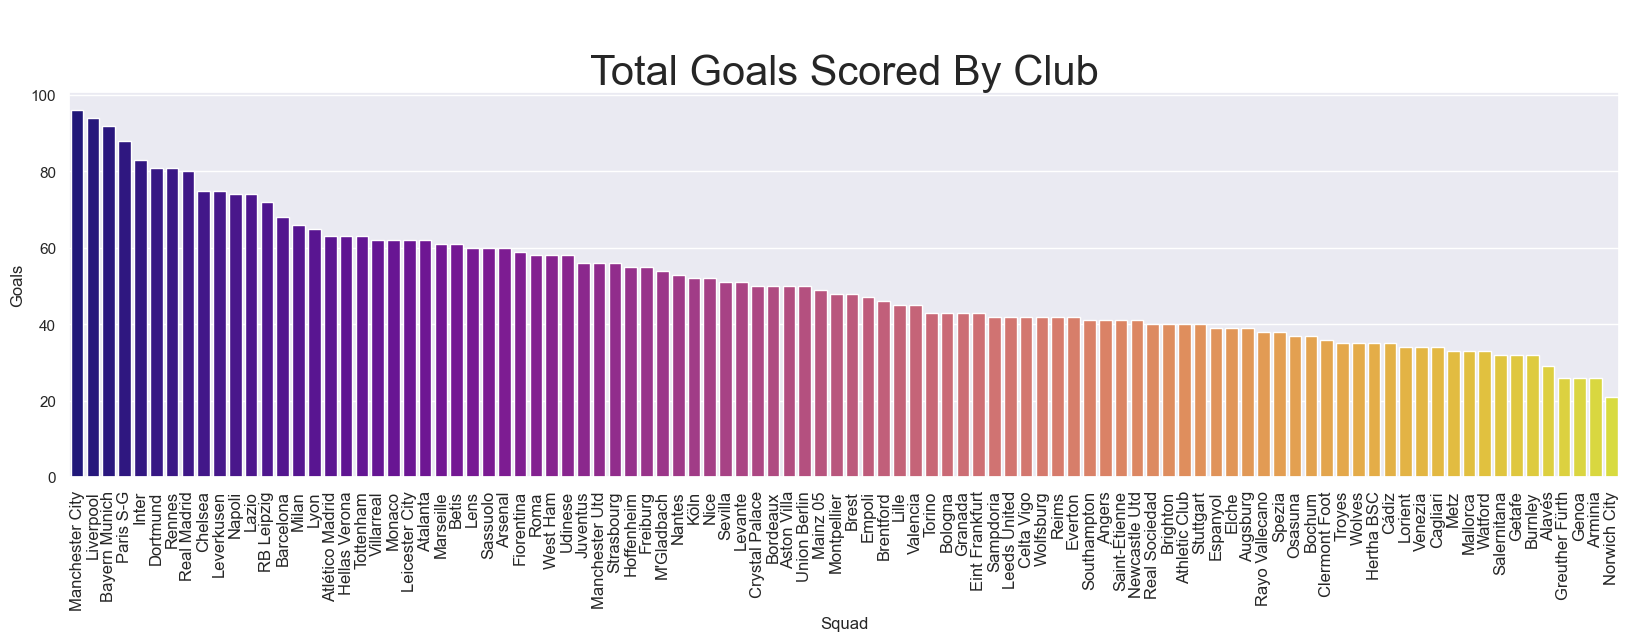

In [ ]:
tks = df_football_stats.groupby('Squad', as_index = False)['Goals'].sum().sort_values(by='Goals', ascending = False)
sns.set(rc={'figure.figsize': (20,5)})
plt.xticks(fontsize=12, rotation = 'vertical')
p = sns.barplot(x = 'Squad', y = 'Goals', data = tks, palette = 'plasma', capsize = .2)
p.axes.set_title('\nTotal Goals Scored By Club', fontsize = 30)

Cluster Analysis - What Players from Premier League are alike? nice viz

c:\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


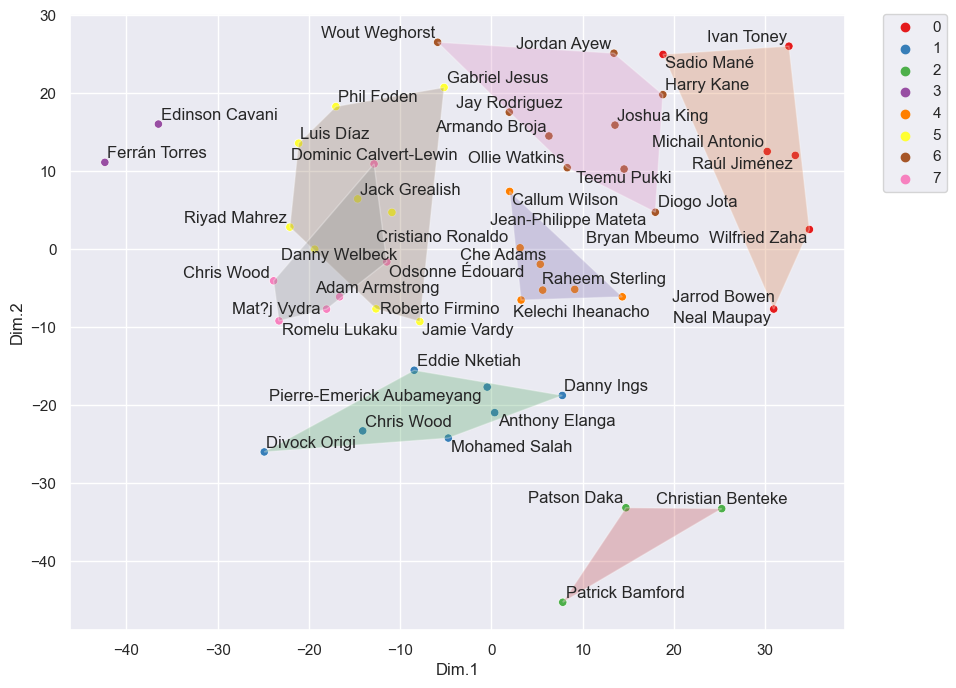

In [ ]:
data1 = df_football_stats[(df_football_stats['Pos'] == 'FW') & (df_football_stats['Goals'] > 1) & (df_football_stats['Comp'] =='Premier League')]

# Include 'Player' in the columns we're interested in
columns_of_interest = ['Player', 'Goals', 'PassComp%', 'Assist', 'CrossComp%', 'Tackle_Won', 'DribbleComp%', 'YCards', 'RCards', 'Fls']
data = data1[columns_of_interest]
data = data.dropna()

# Save player names for later annotations
player_names = data['Player'].values

# Remove 'Player' column before MDS and clustering
data = data.drop(columns=['Player'])

# Perform multidimensional scaling
mds = MDS(n_components=2).fit_transform(data)

mds_df = pd.DataFrame(mds, columns=['Dim.1', 'Dim.2'])

# Prepare data for affinity propagation algorithm.
data_cluster = pairwise_distances(data)

# Perform Affinity Propagation clustering
ap = AffinityPropagation(random_state=None).fit(data_cluster)

# Extract cluster labels
mds_df['cluster'] = ap.labels_

# Convert cluster labels to category type (Python's equivalent of R's factor type)
mds_df['cluster'] = mds_df['cluster'].astype('category')

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim.1', y='Dim.2', hue='cluster', data=mds_df, palette="Set1")

# Annotate points with Player names
texts = []
for i, player in enumerate(player_names):
    texts.append(plt.text(mds_df['Dim.1'][i], mds_df['Dim.2'][i], player))

adjust_text(texts)

# Add convex hulls for each cluster
for cluster in set(mds_df['cluster']):
    points = mds_df[mds_df['cluster'] == cluster][['Dim.1', 'Dim.2']].values
    if points.shape[0] > 2:  # the convex hull algorithm needs at least 3 points
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices,0], points[hull.vertices,1], alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This code performs clustering of football players based on multiple statistics and visualizes the clusters using a scatter plot. Let's break down the insights it provides:

- Data Selection and Preprocessing: The code first selects a subset of data involving football players whose position is "FW" (this stands for "Forwards"). After selection, it keeps only a handful of variables for each player: 'Player', 'Goals', 'PassComp%', 'Assist', 'CrossComp%', 'Tackle_Won', 'DribbleComp%', 'YCards', 'RCards', and 'Fls'. It then drops any rows that contain missing values.

- Dimensionality Reduction: The code uses Multi-Dimensional Scaling (MDS) to reduce the dimensionality of the dataset. This technique preserves the distance between the data points in the high-dimensional space when reducing them to a 2D space, allowing for easier visualization and understanding of the data.

- Clustering: It then performs Affinity Propagation clustering, which is an unsupervised machine learning technique used to categorize data points into clusters based on their similarity. The end goal is to group similar players together.

- Visualization: The code finally visualizes the clusters in a 2D scatter plot, where each point represents a player and is colored based on the cluster they belong to. For better visibility and understanding, it annotates each point with the player's name. Furthermore, it visualizes the clusters' boundaries by creating a convex hull around each cluster.

Insights: From the visualization, we can interpret which players are similar to each other based on their performance statistics. For instance, players within the same cluster have similar performance based on the selected features. This analysis can be useful for scouting players, understanding their playing styles, assessing team strategies, etc.

What makes them similar?

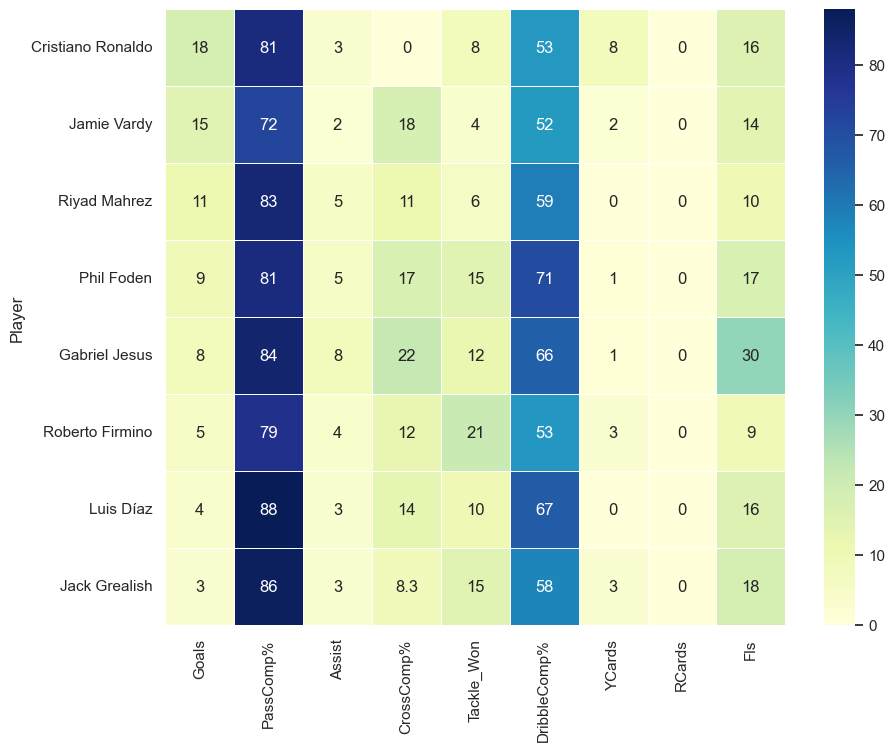

In [ ]:
data1 = df_football_stats[(df_football_stats['Pos'] == 'FW') & (df_football_stats['Goals'] > 1) & (df_football_stats['Comp'] =='Premier League')]

# Include 'Player' in the columns we're interested in
columns_of_interest = ['Player', 'Goals', 'PassComp%', 'Assist', 'CrossComp%', 'Tackle_Won', 'DribbleComp%', 'YCards', 'RCards', 'Fls']
data = data1[columns_of_interest]
data = data.dropna()

# Save player names for later annotations
player_names = data['Player'].values

# Filter and select data
tb = data[(data['Player'].isin(["Roberto Firmino", "Luis Díaz", "Phil Foden", 
                                          "Gabriel Jesus", "Jamie Vardy", "Cristiano Ronaldo",
                                          "Riyad Mahrez", "Jack Grealish"]))]
tb = tb[['Player', 'Goals', 'PassComp%', 'Assist', 'CrossComp%', 'Tackle_Won', 'DribbleComp%', 'YCards', 'RCards', 'Fls']].sort_values(by='Goals', ascending=False)

# Prepare data for plotting
plot = tb.set_index('Player')

# Generate balloon plot (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(data=plot, cmap='YlGnBu', annot=True, linewidths=0.5)
plt.show()

This code is primarily performing data filtering, selection, and visualization. It extracts and analyzes the performance statistics of specific football forwards ('FW') who have scored more than one goal in the Premier League. The key insights it provides are:

- Data Selection and Filtering: The code starts by selecting only the football players who are forwards, have scored more than one goal, and played in the Premier League. This filtering step allows us to focus our analysis on high-performing players in one of the world's top football leagues.

- Data Visualization (Heatmap): The visualization is a heatmap that compares various statistics of a selected group of players: "Roberto Firmino", "Luis Díaz", "Phil Foden", "Gabriel Jesus", "Jamie Vardy", "Cristiano Ronaldo", "Riyad Mahrez", "Jack Grealish". It orders them by the number of goals they scored in descending order. The statistics included are 'Goals', 'Pass Completion %', 'Assists', 'Cross Completion %', 'Tackles Won', 'Dribble Completion %', 'Yellow Cards', 'Red Cards', and 'Fouls'. The heatmap provides an easy way to compare these players across multiple statistics.

From the visualization, we can deduce the strengths and weaknesses of each player across various aspects of the game. For instance, a player with a high 'PassComp%' value is good at passing, while a high 'Goals' value indicates a strong scorer. Conversely, high 'YCards' and 'RCards' values may suggest a player is more prone to fouls and unsporting behavior. This detailed comparison can be valuable for team selection, opponent analysis, player development strategies, etc.

So this code is all about nice football stats. The forwards who've been kicking it in the Premier League, especially those who've scored more than one goal. We're not interested in the rest here.

It's like we're playing football manager, and we've got this cool stats sheet. It has stuff like how many goals a player scored, how good they are at passing ('PassComp%'), the number of assists they've made, and more. It's even got the dirt on them - how many yellow and red cards they've collected.

But we're not looking at everyone. We're focusing on some of the big guns like Roberto Firmino, Luis Díaz, Phil Foden, Gabriel Jesus, Jamie Vardy, Cristiano Ronaldo, Riyad Mahrez, and Jack Grealish.

Correlation analysis - what do the best players have in common?

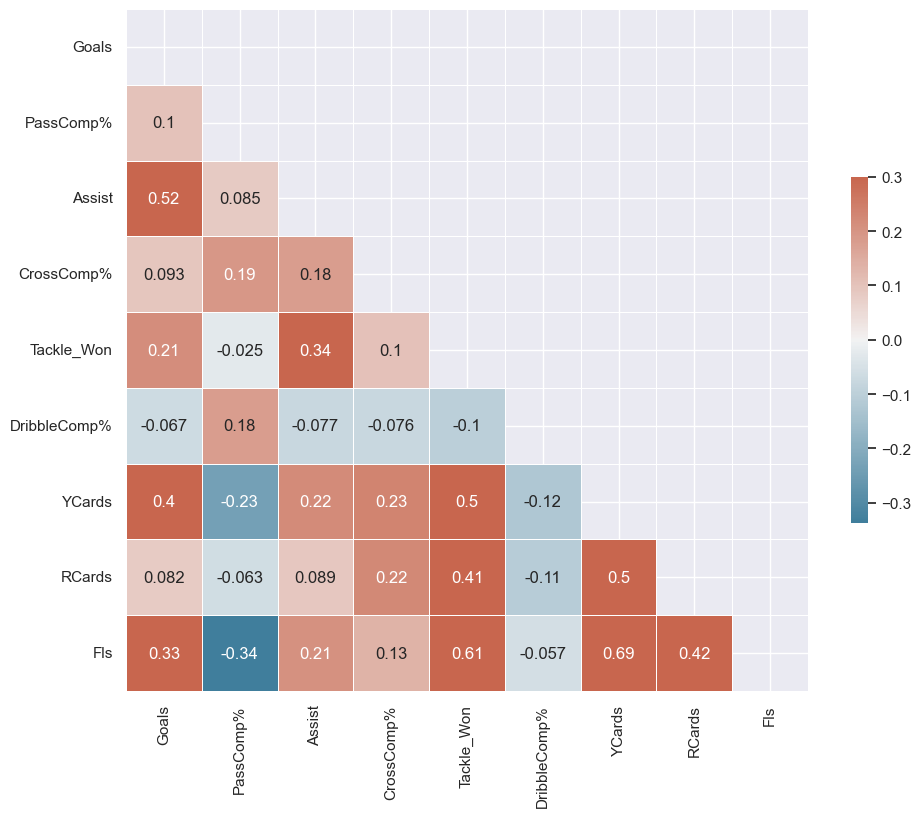

In [ ]:
# Assuming 'data' is your pandas DataFrame
data1 = df_football_stats[(df_football_stats['Pos'] == 'FW') & (df_football_stats['Goals'] > 1) & (df_football_stats['Comp'] =='Premier League')]

# Select only the columns we're interested in
columns_of_interest = ['Goals', 'PassComp%', 'Assist', 'CrossComp%', 'Tackle_Won', 'DribbleComp%', 'YCards', 'RCards', 'Fls']
sub_data = data[columns_of_interest]

corr = sub_data.corr()

# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

This code is all about checking out the relationships between different football statistics for forwards in the Premier League who've scored more than one goal.

It first selects a subset of stats we're interested in: 'Goals', 'Pass Completion%', 'Assist', 'Cross Completion%', 'Tackles Won', 'Dribble Completion%', 'Yellow Cards', 'Red Cards', and 'Fouls'. 

Then it calculates the correlation between each pair of these stats. This correlation tells us how closely related two stats are. For example, if the correlation between 'Goals' and 'Assists' is high, it means players who score a lot of goals also tend to have a lot of assists.

This correlation is calculated for every pair of stats, resulting in a correlation matrix.

But since this matrix is mirrored along its diagonal (the correlation of 'Goals' with 'Assist' is the same as 'Assist' with 'Goals'), we only need to look at half of the matrix. So, a mask is created to hide the upper half.

This correlation matrix is then displayed as a heatmap. In the heatmap, each cell's color represents the correlation between the stats: dark colors represent strong correlations, and light colors represent weak correlations. This makes it super easy to visually pick out which stats are closely related.

For example, if the cell for 'Goals' and 'Assist' is a dark color, it means players who are good at scoring are also good at assisting. But remember, correlation does not imply causation!

Finally, the correlation values are also written in each cell, for those who want the exact numbers.

So, in a nutshell, this code gives us a bird's eye view of how different football stats relate to each other for Premier League forwards. It's a fantastic tool for understanding the multi-dimensional relationships between player's performances.